In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

## Comparison results: Beam-focusing-ma vs Beam-focusing-sa vs Column-based-ma

In [2]:
result_files = {
    "Beam-focusing-ma": {
        "res_0": "/home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/focus/res_0.txt",
        "res_1": "/home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/focus/res_1.txt",
        "res_2": "/home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/focus/res_2.txt",
        # "res_3": "/home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/focus/res_3.txt",
        # "res_4": "/home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/focus/res_4.txt",
    },
    "Beam-focusing-sa": {
        "res_0": "/home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/sa/res_0.txt",
        "res_1": "/home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/sa/res_1.txt",
        "res_2": "/home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/sa/res_2.txt",
        },
    "Column-based-ma": {
        "res_0": "/home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/col/res_0.txt",
        "res_2": "/home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/col/res_2.txt",
        },
}

In [3]:
# get lines with "episode_reward_mean = ..."
def get_episode_rewards(file_path):
    # print(f"Processing file: {file_path}")
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    rewards = []
    for line in lines:
        if "episode_reward_mean" in line:
            parts = line.split(" ")
            reward = float(parts[2][:-1])
            rewards.append(reward)
    return rewards

def smooth(data, window_size=5):
    """Smooth the data using a Gaussian moving average filter."""
    # first, pad the data with zeros
    pad_size = window_size + 3
    data = np.pad(data, (pad_size, pad_size), mode="edge")
    # then, apply the Gaussian moving average filter
    kernel = np.exp(-0.5 * (np.arange(-pad_size, pad_size + 1) / 1) ** 2)
    kernel /= np.sum(kernel)
    smoothed_data = np.convolve(data, kernel, mode="same")
    # remove the padding
    smoothed_data = smoothed_data[pad_size:-pad_size]
    return smoothed_data

def plot_rewards(ppo_data, title):
    plt.figure(figsize=(10, 6))
    lines = []
    for label, files in ppo_data.items():
        all_rewards = []
        for file in files.values():
            rewards = get_episode_rewards(file)
            rewards = np.array(rewards)
            # Smooth the rewards
            rewards = smooth(rewards)
            print(f"file: {file}, rewards: {rewards.shape}")
            all_rewards.append(rewards)
            
        
        # Average rewards across runs
        avg_rewards = np.mean(all_rewards, axis=0)
        std_rewards = np.std(all_rewards, axis=0)
        episodes = np.arange(len(avg_rewards)) * 20
        line, = plt.plot(episodes, avg_rewards, label=label)
        lines.append(line)
        plt.fill_between(episodes, avg_rewards - std_rewards, avg_rewards + std_rewards, alpha=0.2)
    
    plt.title(title, fontsize=16)
    plt.xlabel('Episode', fontsize=14)
    plt.ylabel('Average Reward', fontsize=14)
    # reverse the order of names of legends
    # handles, labels = plt.gca().get_legend_handles_labels()
    # order = [3, 2, 1, 0]
    # plt.legend([handles[i] for i in order], [labels[i] for i in order], fontsize=12, loc='lower right')
    plt.legend(lines, list(ppo_data.keys()), fontsize=12, loc='lower right')
    plt.grid()
    
    # larger font size
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

file: /home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/focus/res_0.txt, rewards: (152,)
file: /home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/focus/res_1.txt, rewards: (152,)
file: /home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/focus/res_2.txt, rewards: (152,)
file: /home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/sa/res_0.txt, rewards: (152,)
file: /home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/sa/res_1.txt, rewards: (152,)
file: /home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/sa/res_2.txt, rewards: (152,)
file: /home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/col/res_0.txt, rewards: (152,)
file: /home/hieule/research/saris_revised/local_assets/Hallway_L/training_log/col/res_2.txt, rewards: (152,)


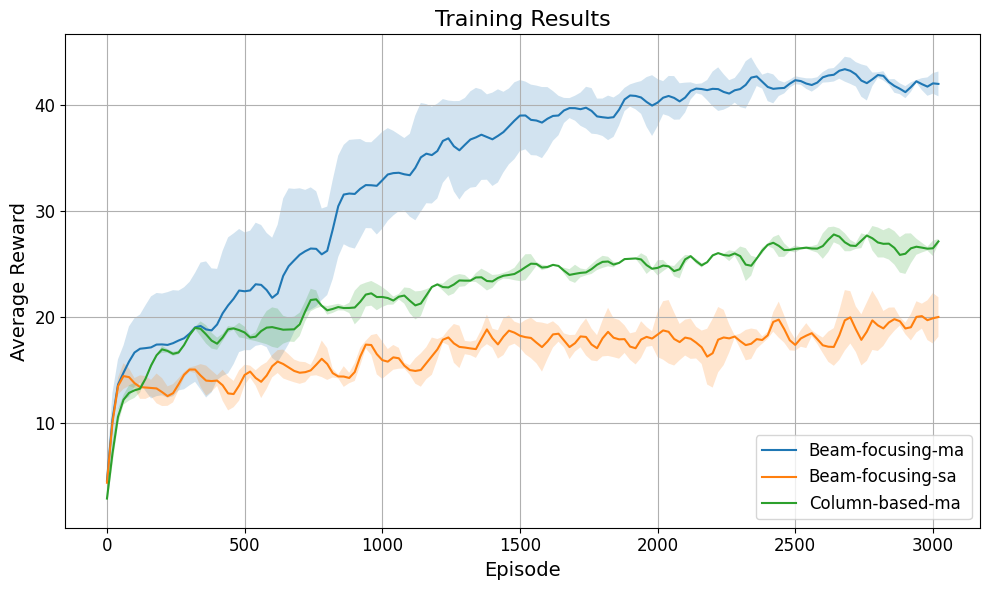

In [4]:
# Plotting the results
plot_rewards(result_files, "Training Results")